In [ ]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
import praw
user_agent = "Term Extraction Scraper 1.0 by u/SeaDry01"
reddit = praw.Reddit(
    client_id="ghU_63Sg6rE5PwVVP9IAxA",
    client_secret="vWlqDp_3xadE5kIltT5WlbZQqMHdbw",
    user_agent=user_agent
)

In [ ]:
headlines = set()

for submission in reddit.subreddit('BlockchainStartups').hot(limit=1000):
    headlines.add(submission.title)
print("Number of unique headlines:", len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Number of unique headlines: 777


In [ ]:
df = pd.DataFrame(headlines, columns=['title'])
df.head()

,title
0,Trump Memecoin: The Surge That Captivated Cryp...
1,BACKEND
2,XDC Network’s v2.5.0-beta1 Upgrade – Major Fix...
3,🚀 CodeKilid: New Blockchain Development Platfo...
4,Would You Use a Platform to Track and Learn fr...


In [ ]:
df.to_csv('headlines.csv', header=False, encoding='utf-8', index=False)

In [ ]:
import praw
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
df = pd.read_csv('headlines.csv', header=None, names=['headline'])

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

df['cleaned_headlines'] = df['headline'].apply(clean_text)

df['tokens'] = df['cleaned_headlines'].apply(word_tokenize)

df.to_csv('cleaned_headlines.csv', index=False)

print("Data cleaning is complete, and the cleaned data is saved in 'cleaned_headlines.csv'.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Data cleaning is complete, and the cleaned data is saved in 'cleaned_headlines.csv'.


In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

df = pd.read_csv("ABCD_file.csv")

df["label"] = df["annotation"].apply(lambda x: 1 if len(eval(x)) > 0 else 0)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["headline"].tolist(), df["label"].tolist(), test_size=0.2, random_state=42
)

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
class TermDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = TermDataset(train_encodings, train_labels)
val_dataset = TermDataset(val_encodings, val_labels)


model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)


trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: janna-saduakassova (janna-saduakassova-aitu) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,0.604200,0.328733
2,0.354200,0.318943
3,0.248600,0.239579


TrainOutput(global_step=234, training_loss=0.3645983251750979, metrics={'train_runtime': 89.7832, 'train_samples_per_second': 20.85, 'train_steps_per_second': 2.606, 'total_flos': 61567986954240.0, 'train_loss': 0.3645983251750979, 'epoch': 3.0})

In [ ]:
preds = trainer.predict(val_dataset)
preds_labels = torch.argmax(torch.tensor(preds.predictions), axis=1).numpy()
precision, recall, f1, _ = precision_recall_fscore_support(val_labels, preds_labels, average="binary")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


model.save_pretrained("./bert_term_extraction")
tokenizer.save_pretrained("./bert_term_extraction")


Precision: 0.9286, Recall: 0.9915, F1-Score: 0.9590


('./bert_term_extraction/tokenizer_config.json',
 './bert_term_extraction/special_tokens_map.json',
 './bert_term_extraction/vocab.txt',
 './bert_term_extraction/added_tokens.json')

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification

model_path = './bert_term_extraction'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

df = pd.read_csv("ABCD_file.csv")

def extract_terms_with_bert(tokens):
    inputs = tokenizer(tokens, padding=True, truncation=True, max_length=128, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1).numpy()

    terms = [tokens[i] for i in range(len(tokens)) if predictions[i] == 1]
    return ' '.join(terms)

df['terms_model'] = df['tokens'].apply(lambda x: extract_terms_with_bert(eval(x)))

df.to_csv('ABCD_with_terms_model.csv', index=False)

print("Term extraction complete. Updated file saved as 'ABCD_with_terms_model.csv'")


Term extraction complete. Updated file saved as 'ABCD_with_terms_model.csv'


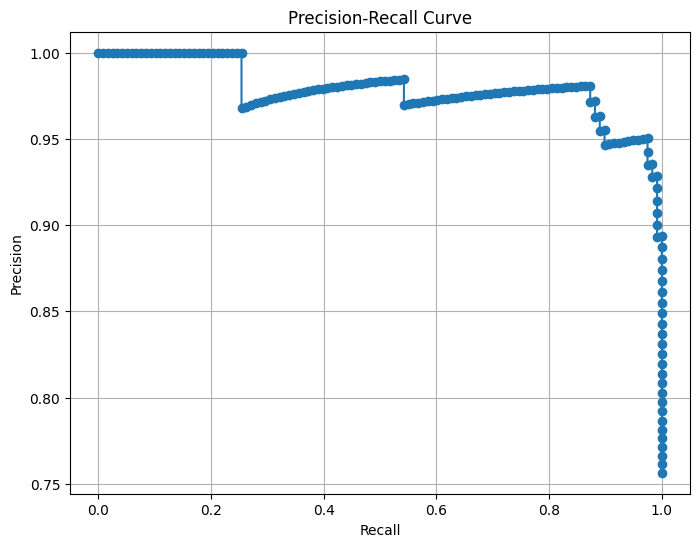

In [ ]:
from sklearn.metrics import precision_recall_curve

precision_vals, recall_vals, _ = precision_recall_curve(val_labels, preds.predictions[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

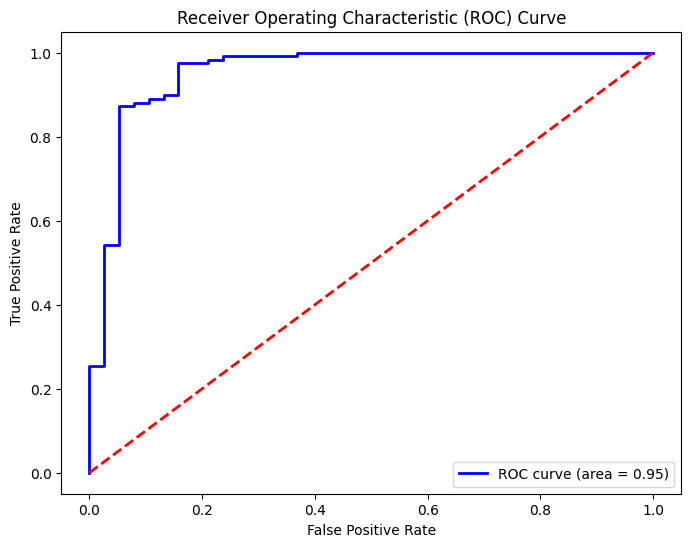

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(val_labels, preds.predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

model_path = './bert_term_extraction'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

nltk.download('stopwords')
nltk.download('punkt')

def clean_and_tokenize(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

def extract_terms_from_text(input_text):
    tokens = clean_and_tokenize(input_text)

    inputs = tokenizer(tokens, padding=True, truncation=True, max_length=128, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1).numpy()

    terms = [tokens[i] for i in range(len(tokens)) if predictions[i] == 1]
    return terms

user_input = input("Please enter the text you want to analyze: ")

extracted_terms = extract_terms_from_text(user_input)

print("Extracted Terms:", extracted_terms)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Please enter the text you want to analyze: Hello and have a great day today
Extracted Terms: []


In [ ]:
from transformers import AutoModelForTokenClassification, AutoTokenizer

model_name = "bert_term_extraction"
model.save_pretrained(model_name)
tokenizer.save_pretrained(model_name)

# Save as a zip file to download from Colab
import shutil
shutil.make_archive(model_name, 'zip', model_name)


'/content/bert_term_extraction.zip'

In [ ]:
import os
print(os.listdir())

['.config', 'bert_term_extraction.zip', '.ipynb_checkpoints', 'logs', 'cleaned_headlines.csv', 'headlines.csv', 'ABCD_with_terms_model.csv', 'ABCD_file.csv', 'bert_term_extraction', 'wandb', 'results', 'sample_data']
